In [1718]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1719]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA


# Carregar os dados
url = 'https://raw.githubusercontent.com/jdlmauricio/techalleg_fase_2/refs/heads/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa.csv'
indice_ibov = pd.read_csv(url, parse_dates=[0], index_col='Data')

datas_completas = pd.date_range(start=indice_ibov.index.min(), end=indice_ibov.index.max(), freq= 'D')
indice_ibov = indice_ibov.reindex(datas_completas)
indice_ibov.index.name = 'Data'

# Visualizar os primeiros registros
print(indice_ibov.tail())


             Último  Abertura   Máxima   Mínima   Vol.    Var%
Data                                                          
2024-12-26  121.078   120.767  121.612  120.428  8,34M   0,26%
2024-12-27  120.269   121.078  121.609  120.252  8,94M  -0,67%
2024-12-28      NaN       NaN      NaN      NaN    NaN     NaN
2024-12-29      NaN       NaN      NaN      NaN    NaN     NaN
2024-12-30  120.283   120.267  121.050  120.158  8,90M   0,01%


C:\Users\jdlma\AppData\Local\Temp\ipykernel_7480\3850632674.py:19: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [1720]:
indice_ibov = indice_ibov.fillna(method='ffill')

C:\Users\jdlma\AppData\Local\Temp\ipykernel_7480\2523758291.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [1721]:
indice_ibov.head(30)


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2005-01-03,25.722,26.193,26.492,25.671,"115,64M","-1,81%"
2005-01-04,24.848,25.722,25.873,24.791,"146,14M","-3,40%"
2005-01-05,24.692,24.859,25.001,24.523,"127,42M","-0,63%"
2005-01-06,24.367,24.695,24.808,24.250,"151,17M","-1,32%"
2005-01-07,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-08,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-09,24.747,24.376,24.874,24.376,"104,96M","1,56%"
2005-01-10,24.292,24.747,24.825,24.086,"126,23M","-1,84%"
2005-01-11,24.370,24.295,24.457,24.127,"111,40M","0,32%"


In [1722]:
indice_ibov['Vol.'] = indice_ibov['Vol.'].str.replace(',', '', regex=False)
indice_ibov['Vol.'] = indice_ibov['Vol.'].str.replace('M', '0000', regex=False)
indice_ibov['Vol.'] = indice_ibov['Vol.'].str.replace('K', '', regex=False)
indice_ibov['Var%'] = indice_ibov['Var%'].str.replace('%', '', regex=False)
indice_ibov['Var%'] = indice_ibov['Var%'].str.replace(',', '.', regex=False)


# Verificando os primeiros valores para verificação
indice_ibov.tail()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-12-26,121.078,120.767,121.612,120.428,8340000,0.26
2024-12-27,120.269,121.078,121.609,120.252,8940000,-0.67
2024-12-28,120.269,121.078,121.609,120.252,8940000,-0.67
2024-12-29,120.269,121.078,121.609,120.252,8940000,-0.67
2024-12-30,120.283,120.267,121.050,120.158,8900000,0.01


In [1723]:
indice_ibov['Vol.'] = indice_ibov['Vol.'].astype(float)
indice_ibov['Var%'] = indice_ibov['Var%'].astype(float)
indice_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7302 entries, 2005-01-03 to 2024-12-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    7302 non-null   float64
 1   Abertura  7302 non-null   float64
 2   Máxima    7302 non-null   float64
 3   Mínima    7302 non-null   float64
 4   Vol.      7302 non-null   float64
 5   Var%      7302 non-null   float64
dtypes: float64(6)
memory usage: 399.3 KB


In [1724]:
#indice_ibov.index = pd.to_datetime(indice_ibov.Data, format = "%d.%m.%Y")
#indice_ibov.drop("Data", inplace=True, axis=1)
indice_ibov.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2005-01-03,25.722,26.193,26.492,25.671,115640000.0,-1.81
2005-01-04,24.848,25.722,25.873,24.791,146140000.0,-3.40
2005-01-05,24.692,24.859,25.001,24.523,127420000.0,-0.63
2005-01-06,24.367,24.695,24.808,24.250,151170000.0,-1.32
2005-01-07,24.747,24.376,24.874,24.376,104960000.0,1.56


In [1725]:
indice_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7302 entries, 2005-01-03 to 2024-12-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    7302 non-null   float64
 1   Abertura  7302 non-null   float64
 2   Máxima    7302 non-null   float64
 3   Mínima    7302 non-null   float64
 4   Vol.      7302 non-null   float64
 5   Var%      7302 non-null   float64
dtypes: float64(6)
memory usage: 399.3 KB


In [1726]:
indice_ibov.loc['20.05.2015']

Último           54.901
Abertura         55.497
Máxima           55.645
Mínima           54.820
Vol.        3380000.000
Var%             -1.080
Name: 2015-05-20 00:00:00, dtype: float64

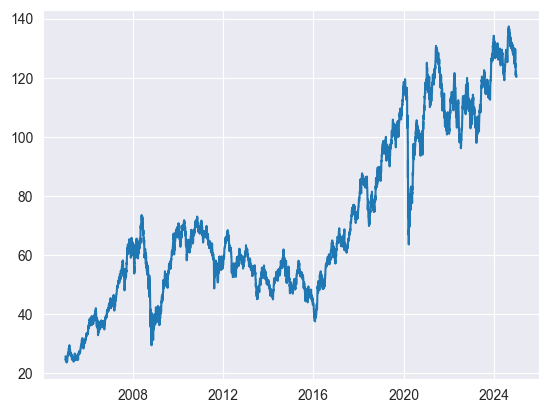

In [1727]:
plt.plot(indice_ibov.index, indice_ibov.Último)

In [1728]:
resultados = seasonal_decompose(indice_ibov['Último'], model='additive', period=252)

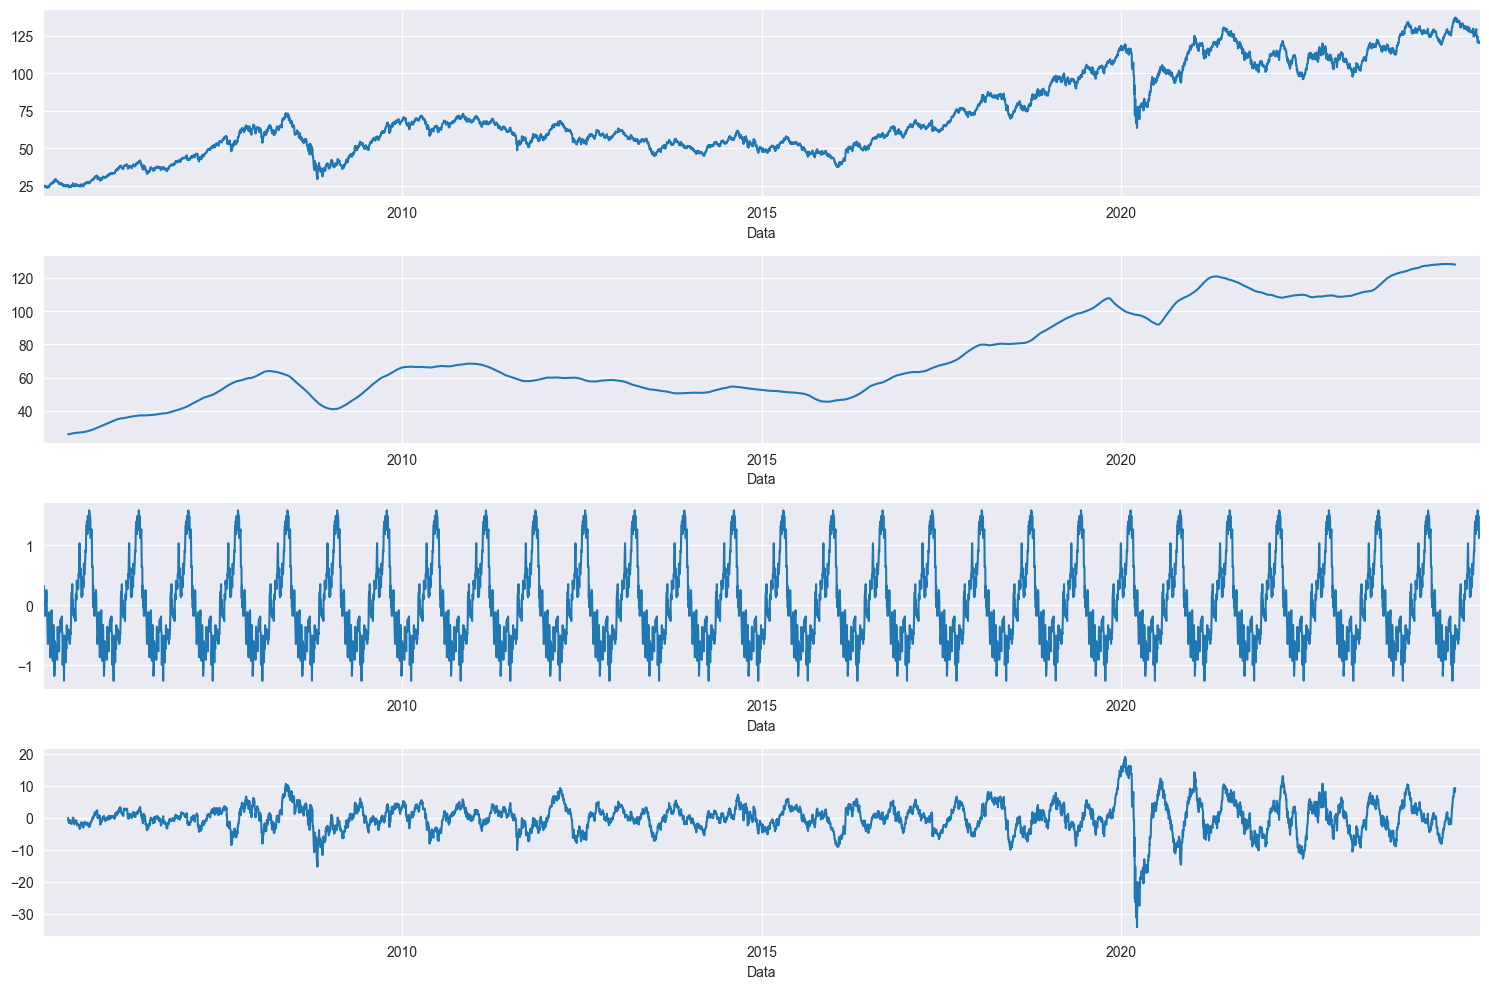

In [1729]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [1730]:
# Estacionária ou não estacionária

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [1731]:
from statsmodels.tsa.stattools import adfuller

In [1732]:
sb.set_style('darkgrid')

In [1733]:
x = indice_ibov.Último.values

In [1734]:
result = adfuller(x)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -1.4260887340795945
P-Value: 0.5697069339282879
Valores críticos:
	1%: -3.4312478321941735
	5%: -2.861936772147779
	10%: -2.5669811975753363


In [1735]:
df = indice_ibov['Último']
df.head()

Data
2005-01-03    25.722
2005-01-04    24.848
2005-01-05    24.692
2005-01-06    24.367
2005-01-07    24.747
Freq: D, Name: Último, dtype: float64

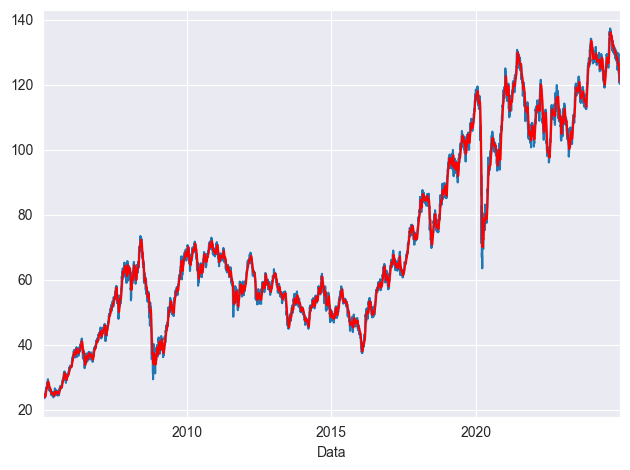

In [1736]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

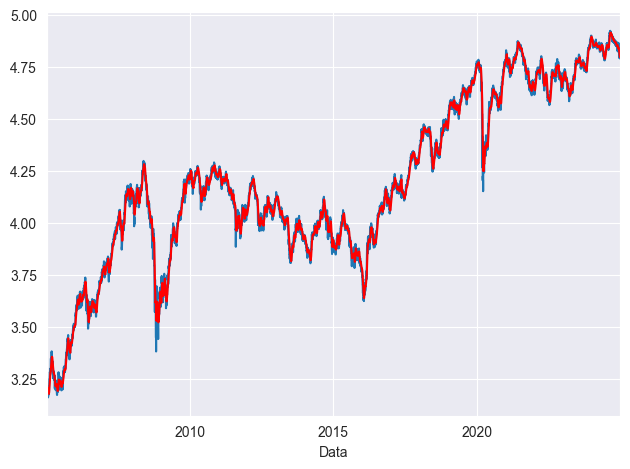

In [1737]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

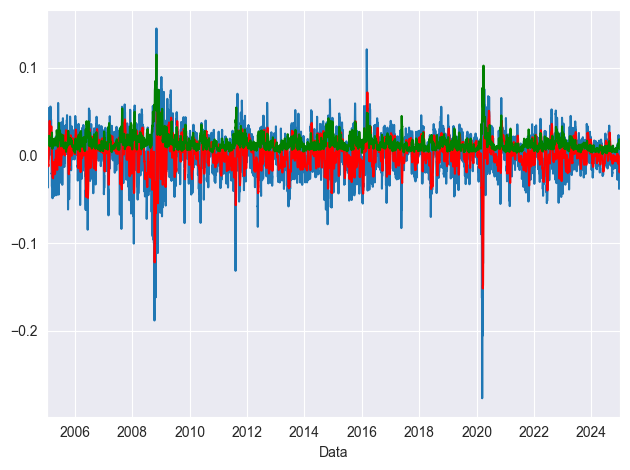

In [1738]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [1739]:
x_s = df_s.values
result_s = adfuller(x_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -13.714463594687762
P-Value: 1.2202745936659708e-25
Valores críticos:
	1%: -3.4312506763970796
	5%: -2.8619380288742584
	10%: -2.566981866550294


Teste ADF
Teste Estatístico: -27.969758969490005
P-Value: 0.0
Valores críticos:
	1%: -3.431253289061384
	5%: -2.861939183293092
	10%: -2.56698248106549


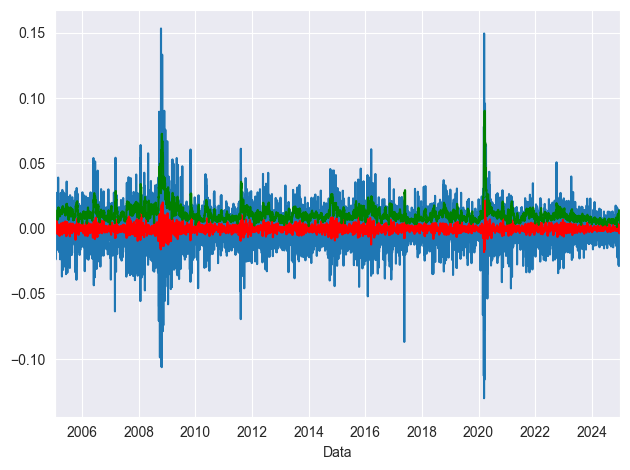

In [1740]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


x_diff = (df_diff - ma_diff).dropna()
result_diff  = adfuller(x_diff )

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")



In [1741]:
#ARIMA - (AR): Autoagressivo, (I): Integrado, (M): Moving Averege

# a(x,y,z) -> ACF, PCF


In [1742]:
lag_acf = acf (df_diff.dropna(), nlags=30)
lag_pacf = pacf(df_diff.dropna(), nlags=30)

In [1743]:
# 5% ACF

# 1.96/sqrt(N-d) -> N - é o número de pontos do df e d é o número de vezes que nós diferenciamos o df

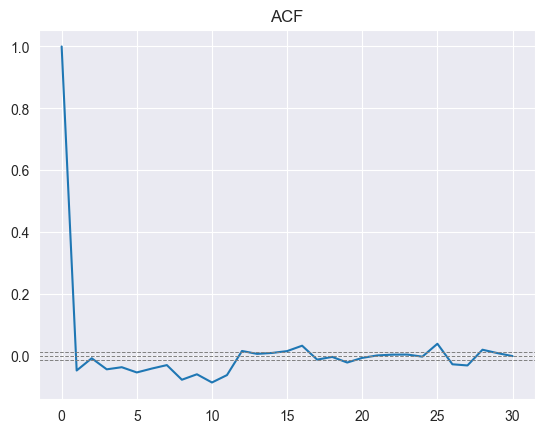

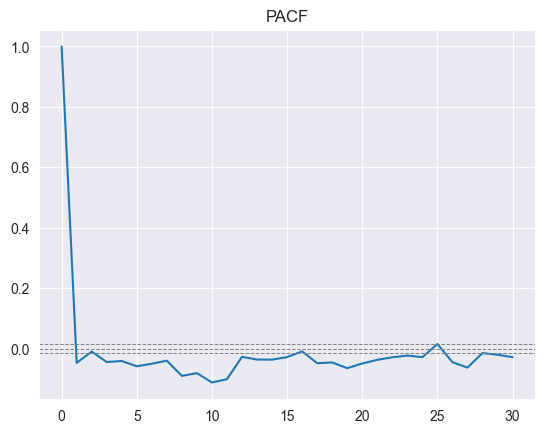

In [1744]:
plt.plot(lag_acf)
plt.axhline(y = -1.196/(np.sqrt((len(df_diff) -1))), linestyle='--', color = 'gray', linewidth=0.7)
plt.axhline(y = -0/(np.sqrt((len(df_diff) -1))), linestyle='--', color = 'gray', linewidth=0.7)
plt.axhline(y = 1.196/(np.sqrt((len(df_diff) -1))), linestyle='--', color = 'gray', linewidth=0.7)
plt.title( 'ACF')

plt.show()


plt.plot(lag_pacf)
plt.axhline(y = -1.196/(np.sqrt((len(df_diff) -1))), linestyle='--', color = 'gray', linewidth=0.7)
plt.axhline(y = -0/(np.sqrt((len(df_diff) -1))), linestyle='--', color = 'gray', linewidth=0.7)
plt.axhline(y = 1.196/(np.sqrt((len(df_diff) -1))), linestyle='--', color = 'gray', linewidth=0.7)
plt.title( 'PACF')

plt.show()

In [1745]:
#a(x, y, z)
#x = ACF cruza o limite superior do intervalo pela primeira vez ou seja  1
#y = PACF cruza o limite superior do intervalo pela primeira vez ou seja  1
#z = a ordem de integração, ou seja, o número de diferenciações para estacionaridade.

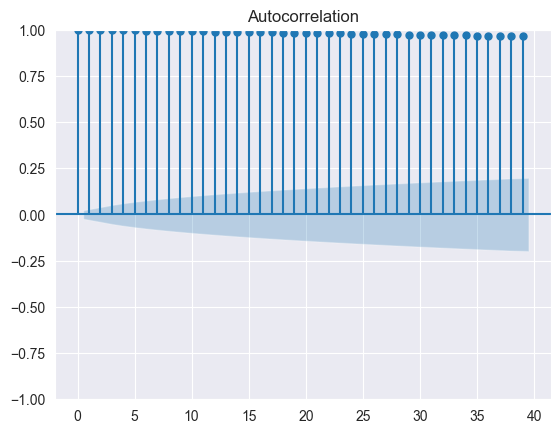

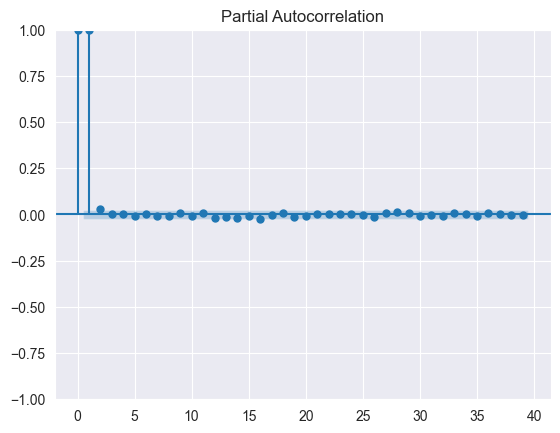

In [1746]:
plot_acf(indice_ibov.Último)
plot_pacf(indice_ibov.Último)
plt.show()

In [1747]:
indice_ibov.columns

Index(['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')

In [1748]:
df_novo = indice_ibov
df_novo = df_novo.reset_index()
df_novo['unique_id'] = 0
df_novo = df_novo[['unique_id','Data', 'Último', 'Máxima', 'Mínima', 'Vol.', 'Var%' ]]



In [1749]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7302 entries, 0 to 7301
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  7302 non-null   int64         
 1   Data       7302 non-null   datetime64[ns]
 2   Último     7302 non-null   float64       
 3   Máxima     7302 non-null   float64       
 4   Mínima     7302 non-null   float64       
 5   Vol.       7302 non-null   float64       
 6   Var%       7302 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 399.5 KB


In [1750]:
df_novo = df_novo.rename(columns={'Data':'ds','Último': 'y'})

df_novo

,unique_id,ds,y,Máxima,Mínima,Vol.,Var%
0,0,2005-01-03,25.722,26.492,25.671,115640000.0,-1.81
1,0,2005-01-04,24.848,25.873,24.791,146140000.0,-3.40
2,0,2005-01-05,24.692,25.001,24.523,127420000.0,-0.63
3,0,2005-01-06,24.367,24.808,24.250,151170000.0,-1.32
4,0,2005-01-07,24.747,24.874,24.376,104960000.0,1.56
...,...,...,...,...,...,...,...
7297,0,2024-12-26,121.078,121.612,120.428,8340000.0,0.26
7298,0,2024-12-27,120.269,121.609,120.252,8940000.0,-0.67
7299,0,2024-12-28,120.269,121.609,120.252,8940000.0,-0.67
7300,0,2024-12-29,120.269,121.609,120.252,8940000.0,-0.67


In [1751]:
df_novo = df_novo[['unique_id','ds','y']]
df_novo.head()

,unique_id,ds,y
0,0,2005-01-03,25.722
1,0,2005-01-04,24.848
2,0,2005-01-05,24.692
3,0,2005-01-06,24.367
4,0,2005-01-07,24.747


In [1752]:
treino = df_novo.loc[df_novo['ds'] < '2024-01-01']
valid = df_novo.loc[(df_novo['ds'] >= '2024-01-01') & (df_novo['ds'] <= '2025-01-01')]
h = valid['ds'].nunique()

In [1753]:
print(h)

365


In [1754]:
valid.head()

,unique_id,ds,y
6937,0,2024-01-01,134.185
6938,0,2024-01-02,132.697
6939,0,2024-01-03,132.834
6940,0,2024-01-04,131.226
6941,0,2024-01-05,132.023


In [1755]:
treino.head()

,unique_id,ds,y
0,0,2005-01-03,25.722
1,0,2005-01-04,24.848
2,0,2005-01-05,24.692
3,0,2005-01-06,24.367
4,0,2005-01-07,24.747


In [1756]:
def wmape (y_true, y_pred):
    return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

WMAPE1: 4.91%


c:\Users\jdlma\Documents\Machine Learning - fase 2\.venv\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning:

invalid value encountered in cast



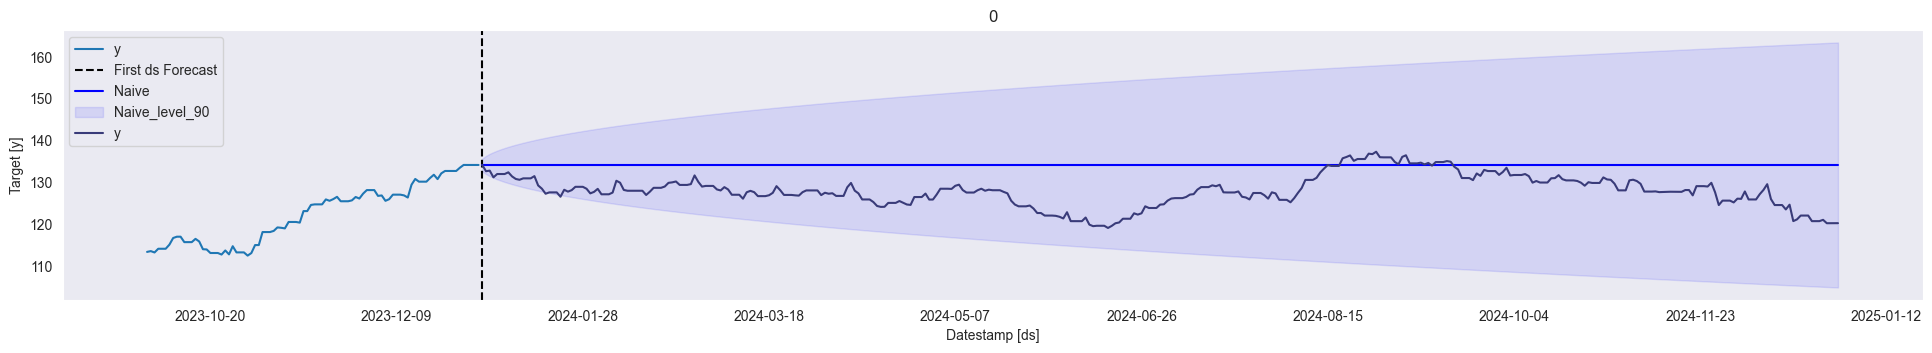

In [1757]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['unique_id', 'ds'], how='left')


wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE1: {wmape1:.2%}")


model.plot(treino, forecast_df, level=[90] ,engine ='matplotlib', max_insample_length=90)



In [1758]:
forecast_df

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,0,2024-01-01,134.184998,132.653259,135.716736,134.185
1,0,2024-01-02,134.184998,132.018784,136.351212,132.697
2,0,2024-01-03,134.184998,131.531937,136.838058,132.834
3,0,2024-01-04,134.184998,131.121506,137.248489,131.226
4,0,2024-01-05,134.184998,130.759903,137.610092,132.023
...,...,...,...,...,...,...
360,0,2024-12-26,134.184998,105.081833,163.288162,121.078
361,0,2024-12-27,134.184998,105.041550,163.328445,120.269
362,0,2024-12-28,134.184998,105.001320,163.368668,120.269
363,0,2024-12-29,134.184998,104.961151,163.408844,120.269


WMAPE2: 4.73%


c:\Users\jdlma\Documents\Machine Learning - fase 2\.venv\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning:

invalid value encountered in cast



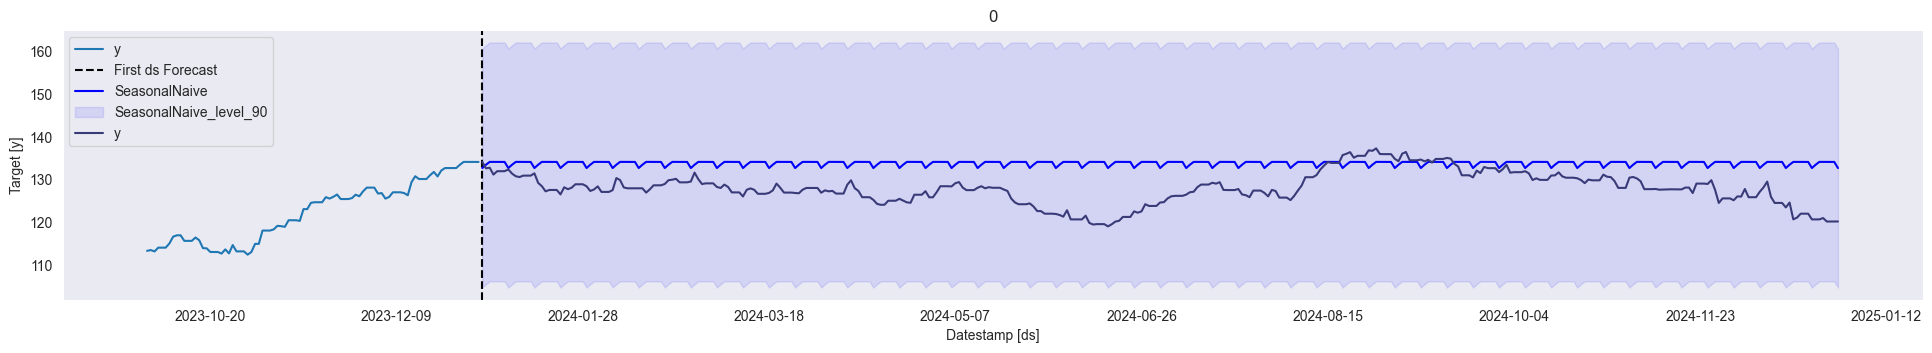

In [1759]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE2: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90],engine ='matplotlib', max_insample_length=90)

c:\Users\jdlma\Documents\Machine Learning - fase 2\.venv\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning:

invalid value encountered in cast



WMAPE3: 4.15%


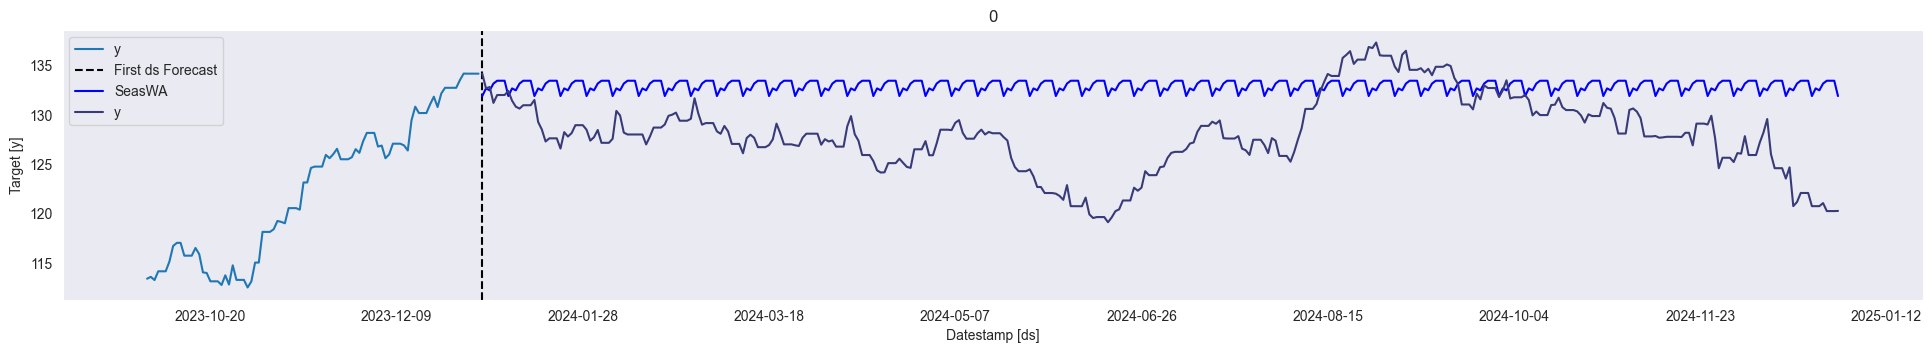

In [1760]:
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h, level=[90])
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
print(f"WMAPE3: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, level=[90],engine ='matplotlib', max_insample_length=90)

WMAPE4: 4.91%


c:\Users\jdlma\Documents\Machine Learning - fase 2\.venv\Lib\site-packages\numpy\core\numeric.py:330: RuntimeWarning:

invalid value encountered in cast



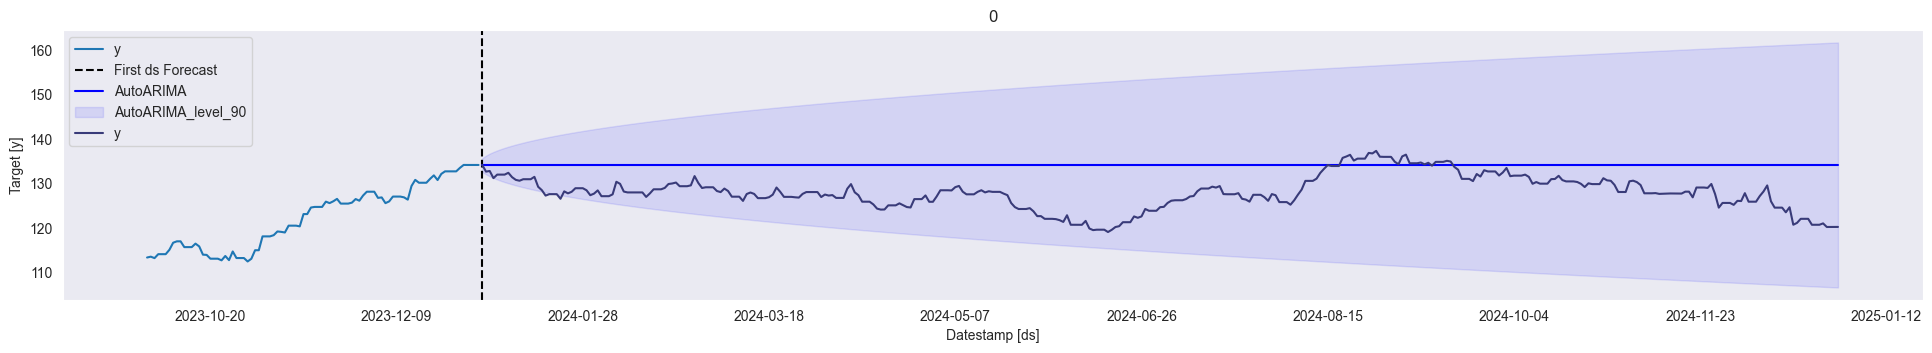

In [1761]:
#ARIMA - AR: olha para as vendas do passado e acha uma correlação futura
# I - quantidade que a série foi diferenciada/ MA: Média Móvel
model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE4: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90],engine ='matplotlib', max_insample_length=90)